Homework 9 Key
====
#### CHE 116: Numerical Methods and Statistics

3/29/2018

----

Homework Requirements:

1. Write all equations in $\LaTeX$
2. Simplify all expressions
2. Put comments in your Python code
3. Explain or show your work
4. Follow the academic honesty guidelines in the syllabus

-----

1. Slicing (20 Points)
===

Answer the following questions by slicing a numpy array containing the given array. Each answer should be done using slicing and summing multiple copies of the array. Do not use `for` loops or any other approach. See example answer. 4 Points each.

$$
[1, 4, 7, 11, 34, -3, 5, 7, 5, 2, 3, 13]
$$



1. $x_0 , x_2,  x_4, \ldots $
2. $x_0 + x_1, x_1 + x_2, \ldots$
3. $x_1 - x_0, x_2 - x_1, \ldots$
4. $ x_0 / x_1, x_2 / x_3, x_4 / x_5 \ldots$
5. $ x_0 \cdot x_N, x_1 \cdot x_{N - 1}, \ldots x_{\frac{N}{2} - 1} \cdot x_{\frac{N}{2}}$

#### 1.1 Answer


In [1]:
import numpy as np
x = np.array([1, 4, 7, 11, 34, -3, 5, 7, 5, 2, 3, 13])
###-------###
x[::2]

array([ 1,  7, 34,  5,  5,  3])

#### 1.2 Answer

In [2]:
x[:-1] + x[1:]

array([ 5, 11, 18, 45, 31,  2, 12, 12,  7,  5, 16])

#### 1.3 Answer

In [3]:
x[1:] - x[:-1]

array([  3,   3,   4,  23, -37,   8,   2,  -2,  -3,   1,  10])

#### 1.4 Answer

In [4]:
x[::2] / x[1::2]

array([  0.25      ,   0.63636364, -11.33333333,   0.71428571,
         2.5       ,   0.23076923])

#### 1.5 Answer

In [5]:
N = len(x)
x[:N // 2] * x[N // 2:]

array([  5,  28,  35,  22, 102, -39])

2. Matrix Calculations (12 Points)
===

Use the two matrices given to answer the following problems. Answer in Python.

$$
\mathbf{A} = \left[\begin{array}{lcr}
3 & 2 & -1\\
6 & 4 & -2\\
5 & 0 & 3\\
\end{array}\right]
\quad
\mathbf{B} = \left[\begin{array}{lcr}
2 & 3 & 2\\
3 & -4 & -2\\
4 & -1 & 1\\
\end{array}\right]
$$

1. [2 points] Report the rank of matrix $\mathbf{A}$
2. [2 points] Compute $\mathbf{A \cdot B}$
3. [4 points] What is the second eigenvector of $\mathbf{B}$? 
4. [4 points] Solve $\mathbf{B}\vec{x} = \vec{b}$ where $\vec{b} = \left[14, -1, 11\right]$

#### Answer 2.1

In [6]:
import numpy.linalg as linalg
A = np.array([ [3, 2, -1], [6, 4, -2], [5, 0, 3]])
B = np.array([ [2, 3, 2], [3, -4, -2], [4, -1, 1]])
linalg.matrix_rank(A)

2

#### Answer 2.2

In [7]:
A @ B

array([[ 8,  2,  1],
       [16,  4,  2],
       [22, 12, 13]])

#### Answer 2.3

In [8]:
eig_vals, eig_vecs = linalg.eig(B)
eig_vecs[:,1]

array([-0.66610619, -0.0601505 , -0.74342751])

#### Answer 2.4

In [9]:
b = np.array([14, -1, 11])
linalg.solve(B, b)

array([3., 2., 1.])

3. Definite Integrals (16 Points)
==

Evaluate the following definite integrals using the `quad` function and the `lambda` keyword. You may only report your answer in Python and you should only print the integral area *to 4 significant figures* and nothing else. Do not define a function, use `lambda` to define your integrands if necessary. 4 points each.

1. $ \int_0^{\pi / 4} \tan x\, dx $

2. $\int_{-2}^0 3x^3\, dx$

3. $\int_0^3 4x^2 - x \,dx$

4. $\int_{-2}^2 \sin x^2 \, dx$

#### Answer 3.1

In [10]:
from scipy.integrate import quad

ans, err = quad(lambda x: np.tan(x), 0, np.pi / 4)
print(f'{ans:.4}')

0.3466


#### Answer 3.2

In [11]:
ans, err = quad(lambda x: 3*x**3, -2, 0)
print(f'{ans:.4}')

-12.0


#### Answer 3.3

In [12]:
ans, err = quad(lambda x: 4 * x**2 - x, 0, 3)
print(f'{ans:.4}')

31.5


#### Answer 3.4

In [13]:
ans, err = quad(lambda x: np.sin(x**2), -2, 2)
print(f'{ans:.4}')

1.61


4. Complex Functions (14 Points)
===

#### 1 (8 Points)
Plot [4 points] & evaluate [4 points] the following definite integral. Report your answer to 4 significant figures.

$$
\int_0^3 f(x)\, dx, \quad f(x) = \; \left. \begin{array}{llr}
x^2 & \textrm{if} &  |x| < 2\\
4 & \textrm{if} & x > 2 \\
x & \textrm{otherwise} & \\
\end{array}\right\}
$$

#### 2 (6 Points)
Evlaute the following integral. Report your answer to 4 significant figures.

$$
\int_0^{1}\int_{-2 x}^x \sin xy \,dy\, dx
$$

#### 4.1 Answer

In [14]:
def fxn(x):
    if abs(x) < 2:
        return x ** 2
    elif x > 2:
        return 4
    else:
        x

npfxn = np.vectorize(fxn)
#remove 1 point if they put lambda x: npfxn(x) instead of just the name.
ans, err = quad(npfxn, 0, 3)
print(f'{ans:.4}')

6.667


### 4.2 Answer

In [15]:
def integrand(x):
    ans, err = quad(lambda y: np.sin(x * y), -2* x, x)
    return ans

ans, err = quad(integrand, 0, 1)
print(f'{ans:.4}')

-0.3038


5. Working with Data (26 Points)
===

Use the given datasets to compute the requested quantities:

```python

x = [-0.42,1.34,1.6,2.65,3.53,4.48,5.48,6.21,7.49,8.14,8.91,10.1]
y = [1.58,1.61,2.04,5.47,9.8,16.46,25.34,33.32,49.7,58.79,71.26,93.34]
```

1. [6 points] Plot $x$ vs $y$
1. [6 points] Compute $\frac{dy}{dx}$ using the central difference rule. Make sure your sigfigs are not overstated. 
2. [6 points] Compute $\int y\, dx$ using the trapezoidal rule
3. [6 points] Compute $\int y\, dx$ using Riemann sums
5. [2 points] Why is the difference so large between the two of them?

#### Answer 5.1

** Note: should have points visible (no line-only plots)**}

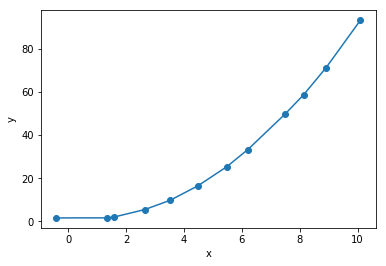

In [16]:
x = [-0.42,1.34,1.6,2.65,3.53,4.48,5.48,6.21,7.49,8.14,8.91,10.1]
y = [1.58,1.61,2.04,5.47,9.8,16.46,25.34,33.32,49.7,58.79,71.26,93.34]
x = np.array(x)
y = np.array(y)
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x,y, 'o-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Answer 5.2

In [17]:
forward = (y[1:] - y[:-1])  / (x[1:] - x[:-1])
diff = 0.5 * (forward[1:] + forward[:-1])
print(np.round(diff, decimals=2))

[ 0.84  2.46  4.09  5.97  7.95  9.91 11.86 13.39 15.09 17.37]


#### Answer 5.3

In [18]:
integral = np.sum( y[:-1] * (x[1:] - x[:-1]))
print(f'{integral:.2f}')

259.45


#### Answer 5.4

In [19]:
integral = np.sum( (y[:1] + y[:-1]) * (x[1:] - x[:-1])) / 2
print(f'{integral:.2f}')

138.03


#### Answer 5.5
The last Riamnn rectangle will underestimate when the function is growing fastest

Extra Credit Confidence Interval (20 Points)
===

Write a function which will compute a confidence interval given a sample and confidence level. Your function should optionally take in the population standard deviation. Your function should return a value, $y$, such that $\mu = \bar{x} \pm y$. Demonstrate it on 3 examples: (1) 10 samples with known population standard deviation, (2) 30 samples with unknonw population standard deviation, and (3) 5 samples with unknown population standard deviation. You must both define the function (+ document it) and show it on these 3 examples to receive full credit. The confidence level (90%, 95%, etc) should be adjustable.

In [20]:
import scipy.stats as ss

def conf_interval(samples, confidence_level=0.95, sigma=None):
    '''
    computes confidence interval given samples
    
    Parameters
    ---------
    samples : list
        The samples
    confidence_level : float, optional
        The confidence level. Default is 95%
    sigam : float, optional
        Population standard deviation. Default is None (unpsecified)
    
    Returns
    ---------
    float
        A value, y, such that the population mean lies at the sample mean +/- y
    '''
    sample_mean = np.mean(samples)
    sample_var = np.var(samples, ddof=1) 
    if sigma is not None:
        sample_var = sigma * sigma
    if sigma is None and len(samples) < 25:
        score = ss.t.ppf((1 - confidence_level) / 2, df=len(samples)-1)
    else:
        score = ss.norm.ppf((1 - confidence_level) / 2)
    y = -score * np.sqrt(sample_var / len(samples))
    return y

In [21]:
# case 1
samples = np.random.normal(size=10)
y = conf_interval(samples, 0.90, 1)
print(f'{np.mean(samples):.2} +/- {y:.2}'.format())

-0.21 +/- 0.52


In [22]:
# case 2
samples = np.random.normal(size=30)
y = conf_interval(samples, 0.95)
print(f'{np.mean(samples):.2} +/- {y:.2}'.format())

-0.052 +/- 0.33


In [23]:
# case 1
samples = np.random.normal(size=5)
y = conf_interval(samples, 0.99)
print(f'{np.mean(samples):.2} +/- {y:.2}'.format())

-0.44 +/- 0.78
